# Linear Regression

In [16]:
import statsmodels.api
import statsmodels.formula.api
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

## Linear regression model definitions

- Population: $ E(Y) = \beta_0 + \beta_1 X $

- Model: $ Y = \beta_0 + \beta_1 X + \epsilon $, where $\epsilon$ is a RV: $\epsilon \sim N(0, \sigma) = Y - E(Y) $

![Linear Regression assumptions](linear_regression.png)

*Figure 1: The statistical assumptions behind linear regression.  The model assumes that the error is normally distributed with constant variance.*

## Creating statistical (frequentist) models

![Pearson correlation table](pearson.png)

*Figure 2: Pearson correlation coefficient values and strengths of correlation.*

1. Run Pearson correlation coefficient $R$ to check correlation: `scipy.stats.pearsonr(ind_var, dep_var)`.
2. Define a cost function (e.g. sum of squared errors).
3. Run the fit (e.g. least-squares) to minimize the cost function to generate $\hat{Y} = b_0 + b_1 X$: `statsmodels.formula.api.ols(model, data).fit()`.
4. Plot residuals for goodness of fit (lack of patterns in residuals).
5. Check the coefficient of determination (R-squared) and p-values to check that error variances do not account for majority of data. This is usually why ANOVA `statsmodels.api.stats.anova_lm(model, typ=2)` is run together with linear regression fitting.
6. Use `prediction.summary_frame()` to get intervals. Prediction intervals (obs_ci*) quantify uncertainty of an individual value given an $x$. Confidence intervals (mean_ci*) quantify uncertainty of population means given an $x$.

Try this below to see if floor area can be used to model the home price in `homes.csv`:

Floor to Price R: (0.2014441592476298, 0.08098816079057175)
Bed to Price R: (-0.28620164983893637, 0.012198002987464577)
Bath to Price R: (0.17467351599268943, 0.131258026500211)
Lot to Price R: (0.24421016652253077, 0.03350373514841434)
Year to Price R: (0.15414014638404347, 0.18369860243719113)
Gar to Price R: (0.3583891514672689, 0.0014784010708664519)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     10.91
Date:                Wed, 22 Sep 2021   Prob (F-statistic):            0.00148
Time:                        17:25:28   Log-Likelihood:                -413.70
No. Observations:                  76   AIC:                             831.4
Df Residuals:                      74   BIC:                             836.1
Df Model: 

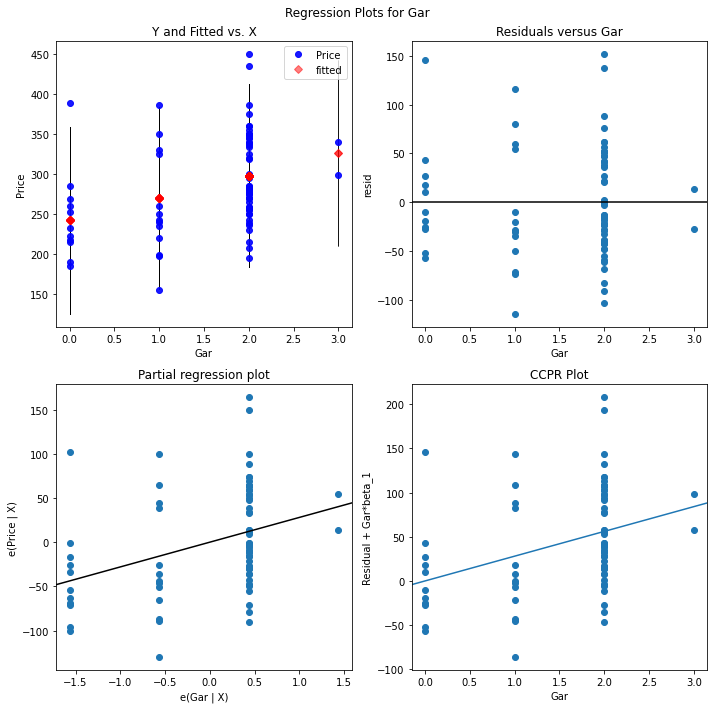

In [19]:
df_homes = pd.read_csv('../as_datasets/homes.csv')

print(f"Floor to Price R: {scipy.stats.pearsonr(df_homes['Floor'], df_homes['Price'])}")
print(f"Bed to Price R: {scipy.stats.pearsonr(df_homes['Bed'], df_homes['Price'])}")
print(f"Bath to Price R: {scipy.stats.pearsonr(df_homes['Bath'], df_homes['Price'])}")
print(f"Lot to Price R: {scipy.stats.pearsonr(df_homes['Lot'], df_homes['Price'])}")
print(f"Year to Price R: {scipy.stats.pearsonr(df_homes['Year'], df_homes['Price'])}")
print(f"Gar to Price R: {scipy.stats.pearsonr(df_homes['Gar'], df_homes['Price'])}")

ols_model = statsmodels.formula.api.ols('Price ~ Gar', data=df_homes)
ols_result = ols_model.fit()
print(ols_result.summary())

ols_gar_fig = plt.figure(figsize=(10, 10))
statsmodels.graphics.regressionplots.plot_regress_exog(ols_result, "Gar", fig=ols_gar_fig)
ols_gar_fig.tight_layout(pad=1.0)

Try linear regression on heights and GPAs in `gpa.csv`:

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.09381
Date:                Wed, 22 Sep 2021   Prob (F-statistic):              0.761
Time:                        17:35:21   Log-Likelihood:                -27.216
No. Observations:                  35   AIC:                             58.43
Df Residuals:                      33   BIC:                             61.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4102      1.435      2.377      0.0

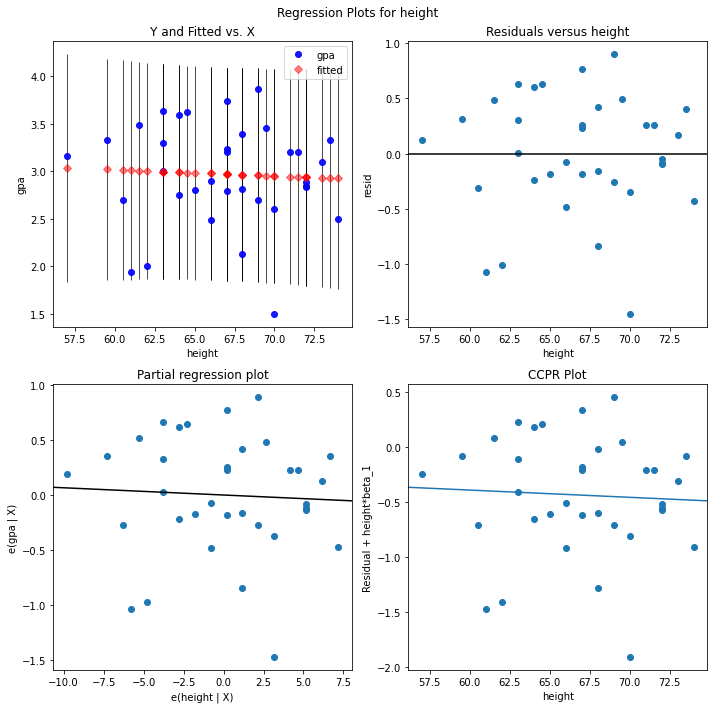

In [20]:
df_gpa = pd.read_csv('../as_datasets/gpa.csv')
df_gpa.head()
ols_model = statsmodels.formula.api.ols('gpa ~ height', data=df_gpa)
ols_result = ols_model.fit()
print(ols_result.summary())

ols_height_fig = plt.figure(figsize = (10,10))
statsmodels.graphics.regressionplots.plot_regress_exog(ols_result, "height", fig = ols_height_fig)
ols_height_fig.tight_layout(pad=1.0)

## Multiple regression

There is not much difference when adding additional predictors.  Let's try this on `Cars.csv`:

C:\Users\curty\mambaforge\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     332.2
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           3.80e-13
Time:                        17:39:38   Log-Likelihood:                -21.142
No. Observations:                  18   AIC:                             48.28
Df Residuals:                      15   BIC:                             50.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5382      0.473      1.137      0.2

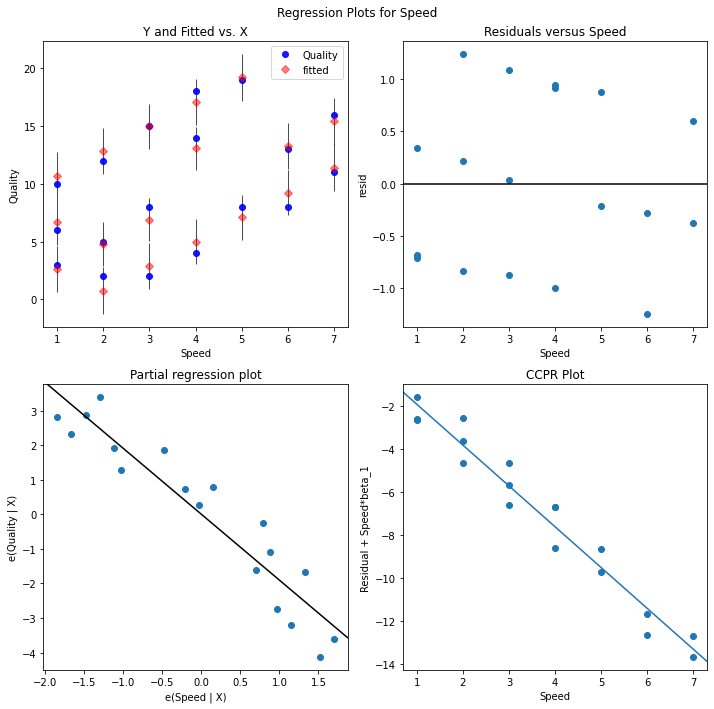

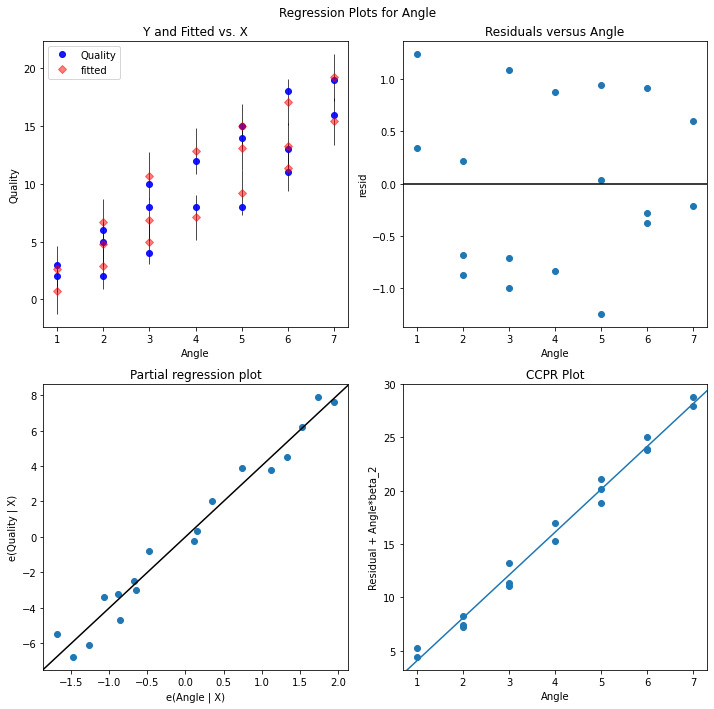

In [21]:
df_cars = pd.read_csv('../as_datasets/Cars.csv')
df_cars.head()
ols_model = statsmodels.formula.api.ols('Quality ~ Speed + Angle', data=df_cars)
ols_result = ols_model.fit()
print(ols_result.summary())

ols_speed_fig = plt.figure(figsize = (10,10))
statsmodels.graphics.regressionplots.plot_regress_exog(ols_result, "Speed", fig = ols_speed_fig)
ols_speed_fig.tight_layout(pad=1.0)

ols_angle_fig = plt.figure(figsize = (10,10))
statsmodels.graphics.regressionplots.plot_regress_exog(ols_result, "Angle", fig = ols_angle_fig)
ols_angle_fig.tight_layout(pad=1.0)

If Pearson shows correlation between predictors, we can include an interaction term (the product of two terms we think are related).  Let's explore `homes.csv`:

Floor to Price R: (0.2014441592476298, 0.08098816079057175)
Bed to Price R: (-0.28620164983893637, 0.012198002987464577)
Bath to Price R: (0.17467351599268943, 0.131258026500211)
Lot to Price R: (0.24421016652253077, 0.03350373514841434)
Year to Price R: (0.15414014638404347, 0.18369860243719113)
Gar to Price R: (0.3583891514672689, 0.0014784010708664519)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3.891
Date:                Wed, 22 Sep 2021   Prob (F-statistic):            0.00361
Time:                        17:45:41   Log-Likelihood:                -409.61
No. Observations:                  76   AIC:                             831.2
Df Residuals:                      70   BIC:                             845.2
Df Model: 

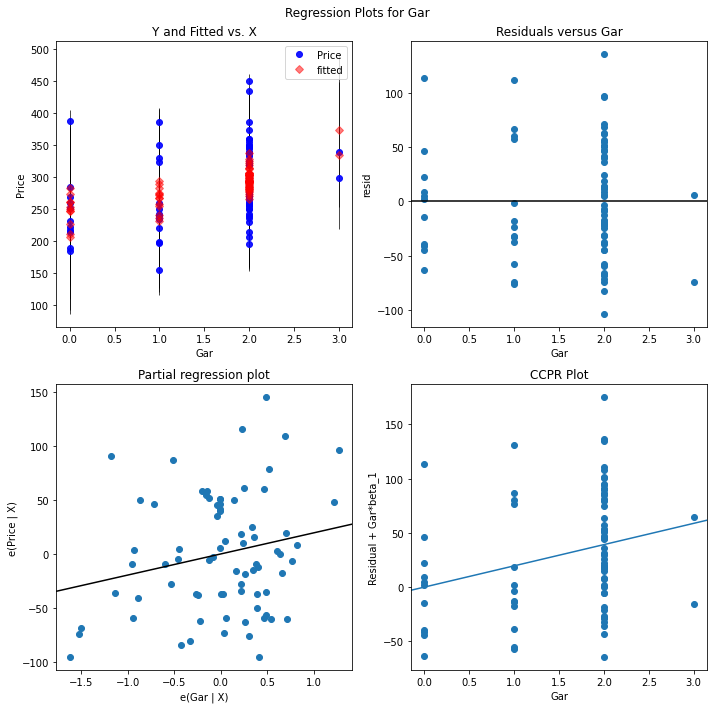

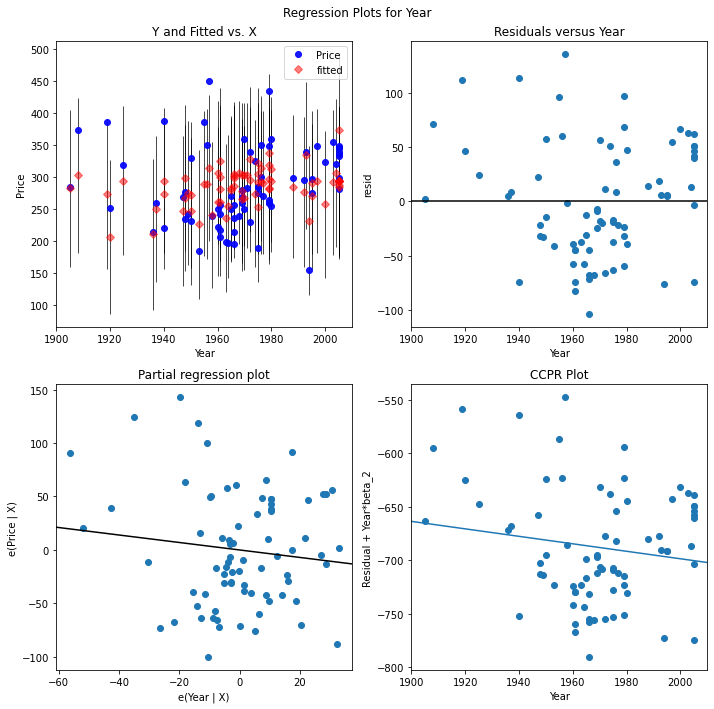

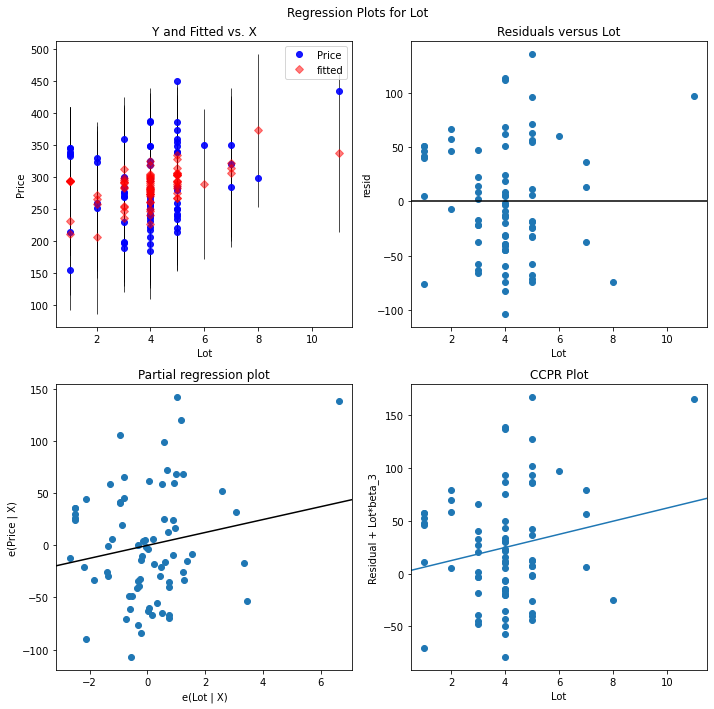

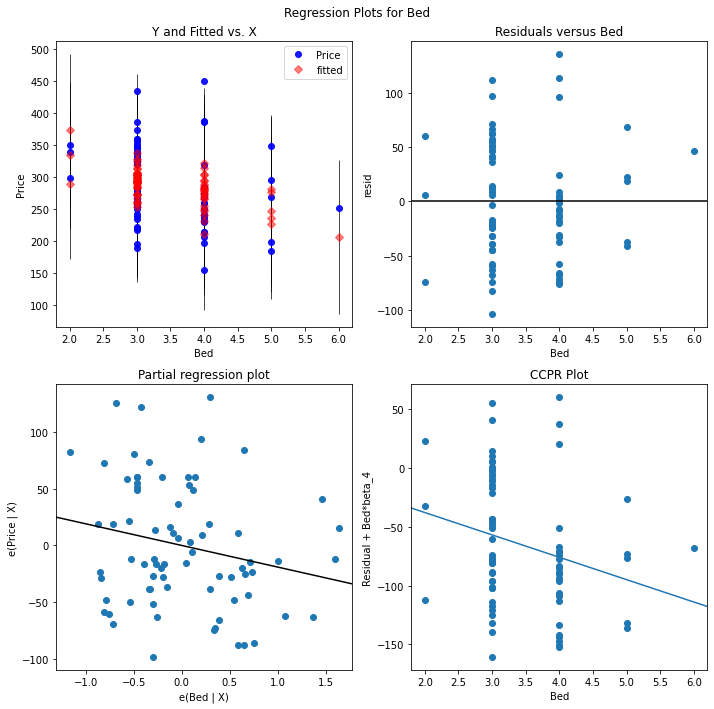

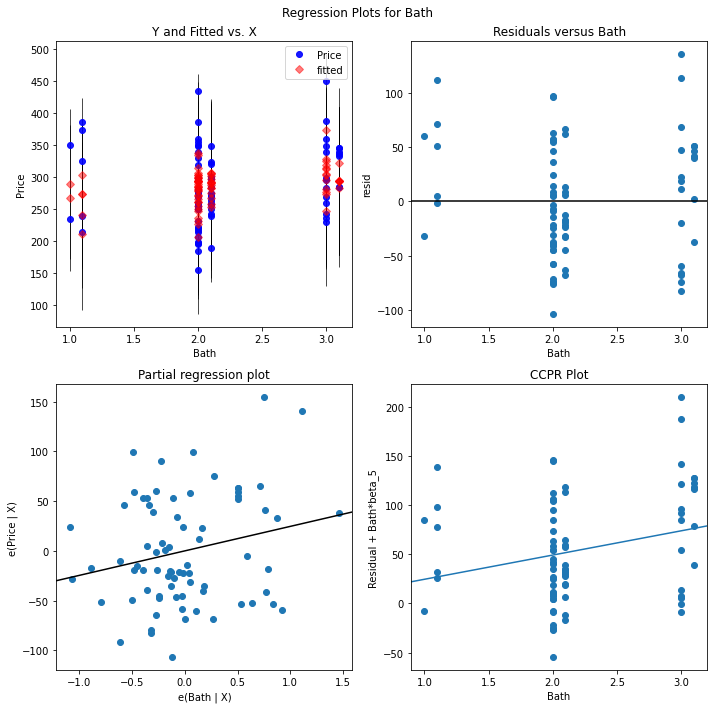

In [22]:
df_homes = pd.read_csv('../as_datasets/homes.csv')

print(f"Floor to Price R: {scipy.stats.pearsonr(df_homes['Floor'], df_homes['Price'])}")
print(f"Bed to Price R: {scipy.stats.pearsonr(df_homes['Bed'], df_homes['Price'])}")
print(f"Bath to Price R: {scipy.stats.pearsonr(df_homes['Bath'], df_homes['Price'])}")
print(f"Lot to Price R: {scipy.stats.pearsonr(df_homes['Lot'], df_homes['Price'])}")
print(f"Year to Price R: {scipy.stats.pearsonr(df_homes['Year'], df_homes['Price'])}")
print(f"Gar to Price R: {scipy.stats.pearsonr(df_homes['Gar'], df_homes['Price'])}")

ols_model = statsmodels.formula.api.ols('Price ~ Gar + Year + Lot + Bed + Bath', data=df_homes)
ols_result = ols_model.fit()
print(ols_result.summary())

for predictor in ['Gar', 'Year', 'Lot', 'Bed', 'Bath']:
    ols_fig = plt.figure(figsize=(10, 10))
    statsmodels.graphics.regressionplots.plot_regress_exog(ols_result, predictor, fig=ols_fig)
    ols_fig.tight_layout(pad=1.0)

## Classification via regression

You can even create classification models via regression, by assigning numerical labels to categorical predictors!

Pandas provides `pd.get_dummies` to facilitate this!  Try it on `Heating.csv`: